In [61]:
import os
import pandas as pd
import numpy as np
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
import itertools

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv('/content/drive/MyDrive/Drive02/forecast.csv')

In [12]:
data.describe()

,Revenue
count,88.000000
mean,3302.034091
std,1477.855719
min,1078.000000
25%,1864.250000
50%,3162.000000
75%,4457.500000
max,6410.000000


In [13]:
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [14]:
data.max()

Time Period    2021Q4
Revenue          6410
dtype: object

In [15]:
data.dtypes

Time Period    object
Revenue         int64
dtype: object

In [16]:
data.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [17]:
data.tail()

,Time Period,Revenue
83,2020Q4,5142
84,2021Q1,5268
85,2021Q2,5077
86,2021Q3,5752
87,2021Q4,5137


<Axes: >

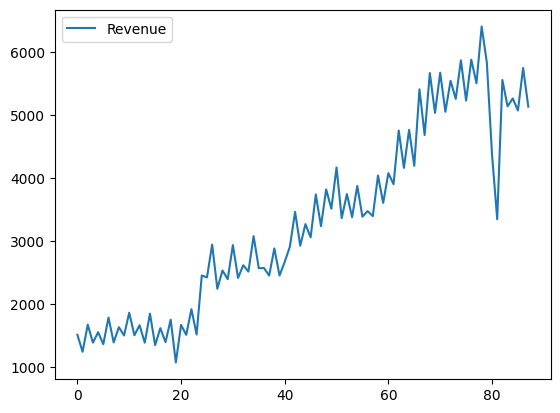

In [18]:
data.plot()

In [20]:
fig = px.line(data, x = 'Time Period', y = 'Revenue')
fig.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

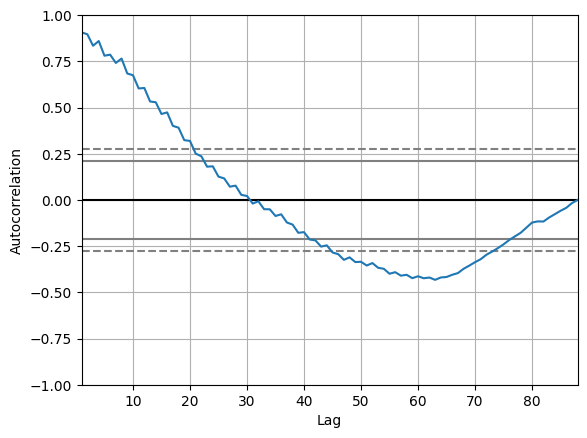

In [32]:
pd.plotting.autocorrelation_plot(data["Revenue"])

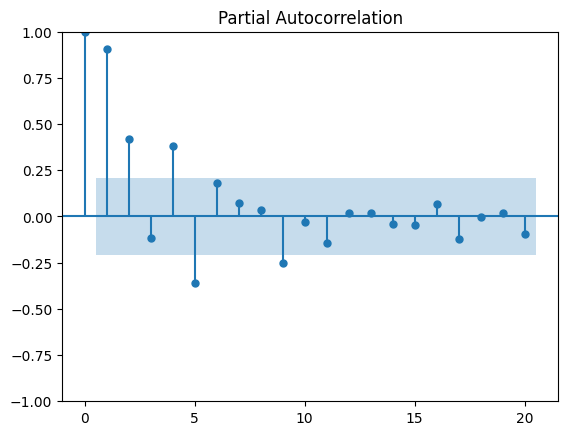

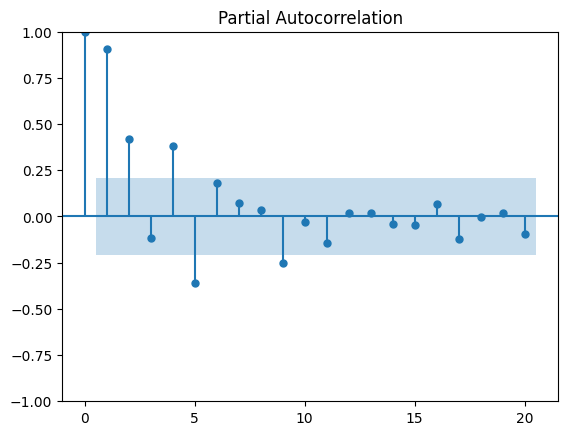

In [33]:
plot_pacf(data["Revenue"], lags = 20)

In [69]:
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(5, 1, 2),
                                seasonal_order=(5, 1, 2, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Mon, 21 Aug 2023   AIC                           1127.041
Time:                                    15:52:03   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5798      0.387     -4.077      0.000      -2.339      -0.820
ar.L2         -1.4322      0.575   